# Разведывательный анализ данных
### Описание проекта
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.
### Цели и задачи проекта
Цель проекта - отследить влияние условий жизни учеников школы в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять учеников, находящихся в группе риска. Для этого необходимо построить модель, которая предсказывала бы результат госэкзамена по математике для каждого ученика.
### Описание датасета
Датасет содержит следующие переменные:
1. school — аббревиатура школы, в которой учится ученик;
2. sex — пол ученика ('M' - мужской, 'F' - женский);
3. age — возраст ученика (от 15 до 22 лет);
4. address — место проживания ученика ('U' - в городе, 'R' - за городом);
5. famsize — размер семьи('LE3' - до 3 человек, 'GT3' - более трех человек);
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - живут раздельно);
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - от 5 до 9 классов, 3 - среднее специальное или 11 классов, 4 - высшее);
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - от 5 до 9 классов, 3 - среднее специальное или 11 классов, 4 - высшее);
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос. служба, 'at_home' - не работает, 'other' - другое);
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос. служба, 'at_home' - не работает, 'other' - другое);
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое);
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое);
13. traveltime — время в пути до школы (1 - менее 15 мин, 2 - 15-30 мин, 3 - 30-60 мин, 4 - более 60 мин);
14. studytime — время на учёбу помимо школы в неделю (1 - менее 2 ч, 2 - 2-5 ч, 3 - 5-10 ч, 4 - более 10 ч);
15. failures — количество внеучебных неудач (n, если 0 <= n <= 3, иначе 4);
16. schoolsup — дополнительная образовательная поддержка школы (yes или no);
17. famsup — семейная образовательная поддержка (yes или no);
18. paid — дополнительные платные занятия по математике (yes или no);
19. activities — дополнительные внеучебные занятия (yes или no);
20. nursery — посещал детский сад (yes или no);
21. Gstudytime — studytime, granular;
22. higher — желание получить высшее образование (yes или no);
23. internet — наличие интернета дома (yes или no);
24. romantic — в романтических отношениях (yes или no);
25. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо);
26. freetime — свободное время после школы (от 1 - очень мало до 5 - очень много);
27. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много);
28. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо);
29. absences — количество пропущенных занятий;
30. score — баллы по госэкзамену по математике.

### Первичная обработка датасета
Импортируем библиотеки

In [1]:
from itertools import combinations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

Читаем данные из файла

In [2]:
data = pd.read_csv('stud_math.xls')

Проверяем названия переменных датасета и переименовываем при необходимости

In [3]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
data.rename(columns={'studytime, granular': 'Gstudytime'}, inplace=True)

Отображаем базовую информацию по датасету

In [5]:
pd.options.display.max_columns = 40
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,Gstudytime,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

### Обработка неверных (ошибочных) значений
Проводим автоматическую замену неверных значений на NaN для переменных с ограниченным набором возможных значений

In [7]:
# Fill the dict with possible column values
possible_vals = {
    'school': ['GP', 'MS'],
    'sex': ['F', 'M'],
    'age': range(15, 23),
    'address': ['U', 'R'],
    'famsize': ['GT3', 'LE3'],
    'Pstatus': ['A', 'T'],
    'Medu': range(0, 5),
    'Fedu': range(0, 5),
    'Mjob': ['at_home', 'health', 'services', 'teacher', 'other'],
    'Fjob': ['at_home', 'health', 'services', 'teacher', 'other'],
    'reason': ['course', 'home', 'reputation', 'other'],
    'guardian': ['mother', 'father', 'other'],
    'traveltime': range(1, 5),
    'studytime': range(1, 5),
    'failures': range(0, 5),
    'schoolsup': ['yes', 'no'],
    'famsup': ['yes', 'no'],
    'paid': ['yes', 'no'],
    'activities': ['yes', 'no'],
    'nursery': ['yes', 'no'],
    'higher': ['yes', 'no'],
    'internet': ['yes', 'no'],
    'romantic': ['yes', 'no'],
    'famrel': range(1, 6),
    'freetime': range(1, 6),
    'goout': range(1, 6),
    'health': range(1, 6),
}

In [8]:
for column, vals in possible_vals.items():
    # Add NaN to list
    vals = list(vals)
    vals.append(np.nan)
    
    # Replace values
    mask = data[column].isin(vals)
    data[column].where(mask, inplace=True)
    
    # Show the result
    replaced_num = data[column].shape[0] - mask.sum()
    if replaced_num:
        print(f"{str(replaced_num).ljust(3)} values have been replaced in column '{column}'")

1   values have been replaced in column 'Fedu'
1   values have been replaced in column 'famrel'


Неверных замененных значений не много, следовательно, всё в порядке и можно переходить к следующему этапу

### Обработка выбросов
Строим боксплоты численных переменных и проверяем на наличие выбросов и неверных значений (для тех переменных, которые не имеют ограниченный диапазон значений)

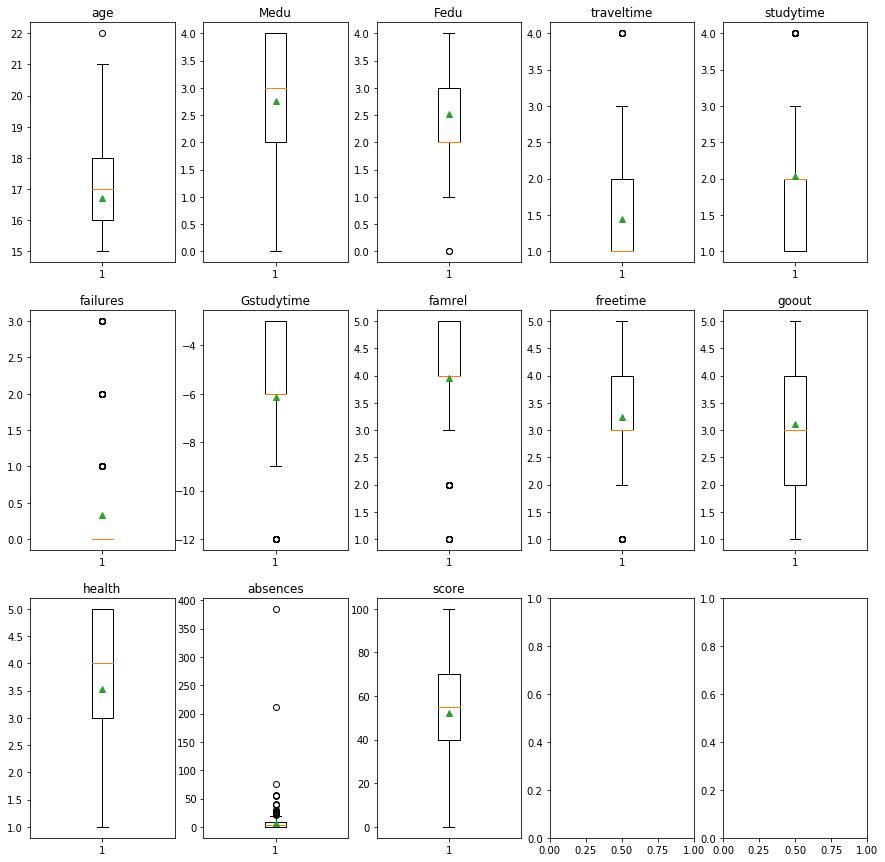

In [9]:
# Calculate number of graphs to plot
graphs_num = 0
for column in data.columns:
    if data[column].dtype != 'O':
        graphs_num += 1

# Create figure with [rows x cols] graphs
cols = 5
rows = graphs_num//cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*5))

# Plot graphs
i = 0
for column in data.columns:
    if data[column].dtype != 'O':
        axs[i//cols, i%cols].boxplot(data.loc[data[column].notna(), column], showmeans=True)
        axs[i//cols, i%cols].set_title(column)
        i += 1

Из графиков видно:
- неверных (противоречащих здравому смыслу) значений не наблюдается ни для одной переменной;
- переменная 'failures' имеет только одно (нулевое) значение внутри усов боксплота, остальное - выбросы. Следовательно, данную переменную можно удалить из датасета.

Удаляем переменную 'failures'

In [10]:
data.drop(columns='failures', inplace= True)

Проводим автоматическую замену выбросов на NaN

In [11]:
for column in data.columns:
    if data[column].dtype != 'O':
        # Calculate NaNs, Q1, Q3, IQR
        NaN_count = data[column].isna().sum()
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Replace values
        mask = data[column].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
        data[column].where(mask, inplace=True)

        # Show the result
        replaced_num = data[column].shape[0] - mask.sum() - NaN_count
        if replaced_num:
            print(f"{str(replaced_num).ljust(3)} values have been replaced in column '{column}'")

1   values have been replaced in column 'age'
2   values have been replaced in column 'Fedu'
7   values have been replaced in column 'traveltime'
27  values have been replaced in column 'studytime'
27  values have been replaced in column 'Gstudytime'
24  values have been replaced in column 'famrel'
18  values have been replaced in column 'freetime'
17  values have been replaced in column 'absences'


### Просмотр уникальных значений
Просматриваем уникальные значения номинативных переменных

In [12]:
for column in data.columns:
    if data[column].dtype == 'O':
        print(column.join(['', ':']).ljust(12), end='')
        print(data[column].unique())

school:     ['GP' 'MS']
sex:        ['F' 'M']
address:    ['U' nan 'R']
famsize:    [nan 'GT3' 'LE3']
Pstatus:    ['A' nan 'T']
Mjob:       ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob:       ['teacher' 'other' nan 'health' 'services' 'at_home']
reason:     ['course' 'other' 'home' 'reputation' nan]
guardian:   ['mother' 'father' 'other' nan]
schoolsup:  ['yes' 'no' nan]
famsup:     ['no' 'yes' nan]
paid:       ['no' nan 'yes']
activities: ['no' 'yes' nan]
nursery:    ['yes' 'no' nan]
higher:     ['yes' nan 'no']
internet:   [nan 'yes' 'no']
romantic:   ['no' nan 'yes']


Просматриваем уникальные значения численных переменных (так как в данном случае уникальных значений для них не много)

In [13]:
for column in data.columns:
    if data[column].dtype != 'O':
        print(column.join(['', ':']).ljust(12), end='')
        print(np.sort(data[column].unique()))

age:        [15. 16. 17. 18. 19. 20. 21. nan]
Medu:       [ 0.  1.  2.  3.  4. nan]
Fedu:       [ 1.  2.  3.  4. nan]
traveltime: [ 1.  2.  3. nan]
studytime:  [ 1.  2.  3. nan]
Gstudytime: [-9. -6. -3. nan]
famrel:     [ 3.  4.  5. nan]
freetime:   [ 2.  3.  4.  5. nan]
goout:      [ 1.  2.  3.  4.  5. nan]
health:     [ 1.  2.  3.  4.  5. nan]
absences:   [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. nan]
score:      [  0.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.
  85.  90.  95. 100.  nan]


Подозрительных значений не обнаружено. Всё в порядке, дополнительной очистки данных не требуется и можно переходить к следующему этапу.

### Корреляционный анализ
Выясним, какие переменные коррелируют со набранным количеством баллов на госэкзамене по математики ('score'). Это поможет выявить переменные, которые стоит оставить для построения модели предсказания.

Рассчитываем матрицу корреляций

In [14]:
corr_table = data.corr()
corr_table

,age,Medu,Fedu,traveltime,studytime,Gstudytime,famrel,freetime,goout,health,absences,score
age,1.000000,-0.167883,-0.162747,0.115437,0.070557,-0.070557,0.041816,0.030180,0.119997,-0.047402,0.129016,-0.153518
Medu,-0.167883,1.000000,0.639999,-0.135171,0.091193,-0.091193,0.060018,0.012817,0.064164,-0.045051,0.065712,0.213349
Fedu,-0.162747,0.639999,1.000000,-0.094873,0.089786,-0.089786,-0.009928,-0.040852,0.040199,0.008538,-0.020560,0.139615
traveltime,0.115437,-0.135171,-0.094873,1.000000,-0.128818,0.128818,-0.044674,-0.062865,-0.033557,-0.035184,-0.065529,-0.072792
studytime,0.070557,0.091193,0.089786,-0.128818,1.000000,-1.000000,0.079992,-0.089910,-0.047142,-0.042698,-0.083024,0.112830
Gstudytime,-0.070557,-0.091193,-0.089786,0.128818,-1.000000,1.000000,-0.079992,0.089910,0.047142,0.042698,0.083024,-0.112830
famrel,0.041816,0.060018,-0.009928,-0.044674,0.079992,-0.079992,1.000000,0.107271,0.096541,0.028073,-0.020196,0.057692
freetime,0.030180,0.012817,-0.040852,-0.062865,-0.089910,0.089910,0.107271,1.000000,0.258559,0.056916,0.092394,0.000582
goout,0.119997,0.064164,0.040199,-0.033557,-0.047142,0.047142,0.096541,0.258559,1.000000,-0.015608,0.111587,-0.129685
health,-0.047402,-0.045051,0.008538,-0.035184,-0.042698,0.042698,0.028073,0.056916,-0.015608,1.000000,-0.014358,-0.070460


Сортируем значения корреляций со 'score' по модулю

In [15]:
corr_table['score'].abs().sort_values(ascending=False)

score         1.000000
Medu          0.213349
age           0.153518
Fedu          0.139615
goout         0.129685
Gstudytime    0.112830
studytime     0.112830
absences      0.081274
traveltime    0.072792
health        0.070460
famrel        0.057692
freetime      0.000582
Name: score, dtype: float64

Из полученных значений видно, что переменная набранных баллов 'score' не коррелирует с переменной свободного времени ученика ('freetime').

Удаляем переменную 'freetime'

In [16]:
data.drop(columns='freetime', inplace=True)

### Анализ номинативных переменных
Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различается ли распределение баллов по госэкзамену 'score' в зависимости от значения этих переменных.

С помощью теста Стьюдента проверим есть ли статистически значимая разница в распределении 'score' для разных значений номинативных переменных.

Проверяем нулевую гипотезу о том, что распределения 'score' по различным значениям номинативных переменных неразличимы

In [17]:
not_signif_columns = []
for column in data.columns:
    if data[column].dtype == 'O':
        top10_values = data[column].value_counts().index[:10]
        combs = list(combinations(top10_values, 2))
        for comb in combs:
            if ttest_ind(data.loc[(data[column] == comb[0]) & (data['score'].notna()), 'score'], 
                         data.loc[(data[column] == comb[1]) & (data['score'].notna()), 'score']). \
                            pvalue <= 0.05/len(combs): # Bonferroni correction
                break
        else:
            not_signif_columns.append(column)
            
print('Statistically significant differences have NOT been found for columns:')
for column in not_signif_columns:
    print(f"'{column}'")

Statistically significant differences have NOT been found for columns:
'school'
'sex'
'famsize'
'Pstatus'
'Fjob'
'reason'
'guardian'
'schoolsup'
'famsup'
'paid'
'activities'
'nursery'
'internet'


Удаляем переменные, для которых не найдены статистически значимые различия

In [18]:
data.drop(columns=not_signif_columns, inplace=True)

Строим боксплоты распределения 'score' для разных значений номинативных переменных, которые мы оставили

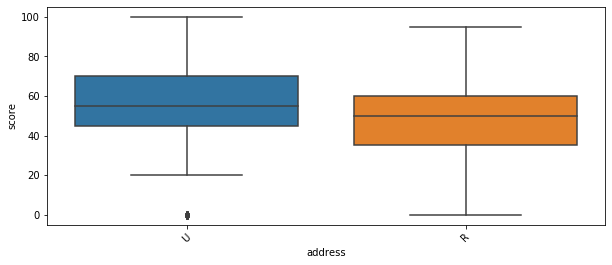

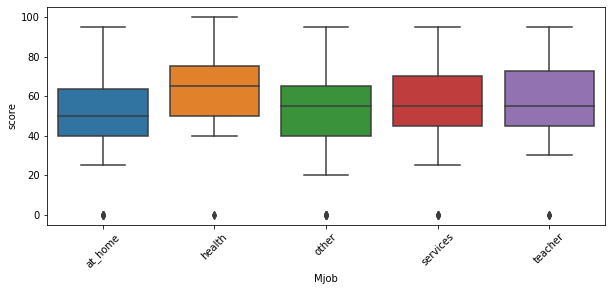

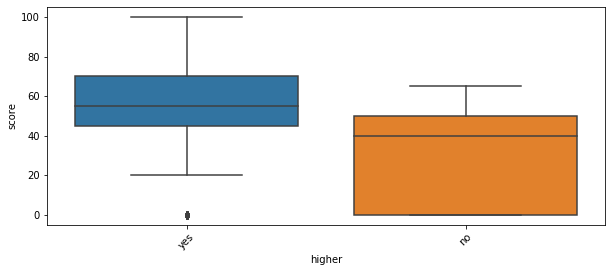

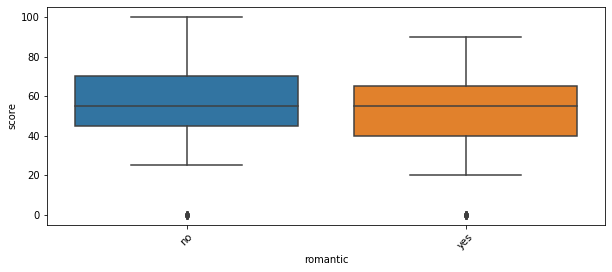

In [19]:
for column in data.columns:
    if data[column].dtype == 'O':
        fig, ax = plt.subplots(figsize=(10, 4))
        sns.boxplot(x=column,
                    y='score', 
                    data=data[data[column].isin(data[column].value_counts().index[:10])],
                    ax=ax)
        plt.xticks(rotation=45)
        plt.show()

Выведем все переменные, которые, возможно, оказывают влияние на количество баллов на госэкзамене по математике

In [20]:
signif_columns = list(data.columns)
signif_columns.remove('score')
print(signif_columns)

['age', 'address', 'Medu', 'Fedu', 'Mjob', 'traveltime', 'studytime', 'Gstudytime', 'higher', 'romantic', 'famrel', 'goout', 'health', 'absences']


### Результаты EDA
Итак, в результате анализа влияния параметров ученика на количество набранных им баллов на госэкзамене по математике можно сделать следующие выводы:

1. Данные можно считать достаточно чистыми, так как:
    - максимальная доля пустых значений - 10,1 % (у переменной 'paid');
    - присутствует всего 2 неверных значения (одно у переменной 'Fedu' и одно у 'famrel').
2. Максимальное количество выбросов - 27 (у переменных 'studytime' и 'Gstudytime').
3. Положительная корреляция имеется с переменными (по убыванию корреляции): 'Medu', 'Fedu', 'studytime', 'absences', 'famrel'. Здесь неожиданной оказалась положительная корреляция с количеством пропущенных занятий 'absences'.
4. Отрицательная корреляция имеется с переменными (по убыванию корреляции): 'age', 'goout', 'Gstudytime', 'traveltime', 'health'. Здесь неочевидными оказались отрицательные корреляции с созрастом 'age' и здоровьем 'health'.
5. Важные для построения модели номинативные переменные: 'address', 'Mjob', 'higher', 'romantic'.